In [1]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY
from GaussFit import StripFit, Linescan
from HoughLine import show_hough_linetransform, show_ransac_points_line

In [2]:
targetdir = '/Users/aimachine/Documents/KymoGraphLineScans/Result/'

linescanimage = '/Users/aimachine/Documents/KymoGraphLineScans/LineScanTime.tif'

#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.212



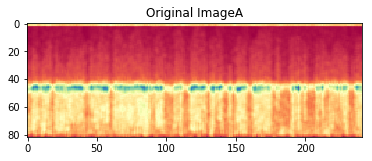

In [3]:
originalimage = imread(linescanimage)
singleplot(originalimage, 'Original ImageA')

Ransac Slope =  6.853e-05
Regression Slope =  8.100e-05
Mean Thickness =  0.225 um


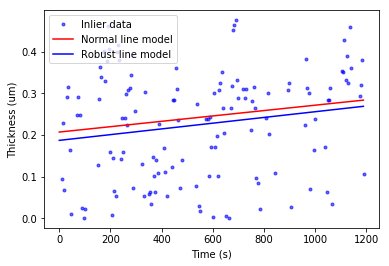

In [4]:
Fwhm, time = StripFit(originalimage, Time_unit, Xcalibration)

Fwhm_time = np.column_stack([time, Fwhm])

show_ransac_points_line(Fwhm_time, min_samples=2, residual_threshold=0.5, max_trials=1000, Xrange = time[-1])



